# 3. Exploratory Data Analysis

After collecting the data, cleaning it and engineering additional features, we will now proceed to visualize the dataset to understand some of the relationship between the features. Additional visualization was also done via Tableau which can be find in this [link](https://public.tableau.com/app/profile/casper.wong/viz/HDB_16339564614480/HDBResalePriceAnalysis).

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 1000)

# Reading Data

In [3]:
# read in df with all the geo coordinates plus newly engineered features
df = pd.read_csv('../datasets/final/hdb_combine (3 Nov).csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,longitude,latitude,year_transacted,age,resale_price_inflate,psf,floor_area_sqf,nearest_mrt_station_dist,nearest_mrt_station,nearest_primary_school_dist,nearest_primary_school,nearest_secondary_school_dist,nearest_secondary_school,nearest_mall_dist,nearest_mall,dist_cbd,avg_storey
0,10/1/2011,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986,283000.0,103.837619,1.375097,2011,35,311671.5192,438.193096,645.8340,0.420801,MAYFLOWER,0.232987,MAYFLOWER PRIMARY SCHOOL JAN 2019 - DEC 2021,0.595743,YIO CHU KANG SECONDARY SCHOOL,0.990781,BROADWAY PLAZA,10.256373,2
1,10/1/2011,SENGKANG,4 ROOM,259B,COMPASSVALE RD,07 TO 09,85.0,Model A2,2001,461000.0,103.897506,1.393871,2011,20,507705.1956,503.862857,914.9315,0.330347,SENGKANG,0.072371,COMPASSVALE PRIMARY SCHOOL,0.362637,COMPASSVALE SECONDARY SCHOOL,0.337984,COMPASS ONE,13.256963,8
2,10/1/2011,SENGKANG,4 ROOM,249,COMPASSVALE RD,10 TO 12,85.0,Model A2,2000,435000.0,103.899173,1.391762,2011,21,479071.0631,475.445430,914.9315,0.410204,SENGKANG,0.260362,SENG KANG PRIMARY SCHOOL,0.492838,COMPASSVALE SECONDARY SCHOOL,0.457340,COMPASS ONE,13.114723,11
3,10/1/2011,SENGKANG,4 ROOM,247,COMPASSVALE RD,07 TO 09,85.0,Model A2,2000,426000.0,103.899249,1.392092,2011,21,469159.2480,465.608628,914.9315,0.420938,SENGKANG,0.294318,SENG KANG PRIMARY SCHOOL,0.455200,COMPASSVALE SECONDARY SCHOOL,0.464680,COMPASS ONE,13.151793,8
4,10/1/2011,SENGKANG,4 ROOM,322A,ANCHORVALE DR,01 TO 03,85.0,Model A2,2002,430000.0,103.892314,1.391521,2011,19,473564.4992,469.980540,914.9315,0.353131,SENGKANG,0.147520,NAN CHIAU PRIMARY SCHOOL,0.867638,SENG KANG SECONDARY SCHOOL,0.312209,COMPASS ONE,12.800147,2


In [4]:
df.shape

(206191, 27)

In [4]:
df['month'] = pd.to_datetime(df['month'])
df.set_index('month', inplace=True)
df.sort_index(inplace=True)

In [5]:
df.drop(columns=['floor_area_sqm', 'lease_commence_date'], inplace=True)

# EDA

Ideas
- study pricing trend of HDB units which were transacted multiple times (if any)
- analyze pricing trend of different flat model
- looking at flat model popularity throughout the years
- looking at estate popularity throughout the years

In [6]:
# note that this only shows numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resale_price,206191.0,452824.007667,143918.559561,140000.000000,350000.000000,425000.000000,525000.000000,1.295000e+06
longitude,206191.0,103.839830,0.072547,103.685228,103.775201,103.845163,103.899174,1.039881e+02
latitude,206191.0,1.366250,0.042793,1.270380,1.336427,1.363948,1.393334,1.457071e+00
year_transacted,206191.0,2016.563812,3.014195,2011.000000,2014.000000,2017.000000,2019.000000,2.021000e+03
age,206191.0,28.340165,12.287579,2.000000,20.000000,29.000000,37.000000,5.500000e+01
resale_price_inflate,206191.0,463713.772150,146933.463215,142100.000000,358170.826400,436450.000000,537478.822900,1.295000e+06
psf,206191.0,437.276046,105.415114,194.125943,367.992917,415.108076,477.228709,1.198750e+03
floor_area_sqf,206191.0,1047.274917,262.592512,333.680900,807.292500,1022.570500,1205.556800,2.615628e+03
nearest_mrt_station_dist,206191.0,0.738379,0.418658,0.036149,0.439870,0.661067,0.936460,3.517107e+00
nearest_primary_school_dist,206191.0,0.438474,0.278147,0.042789,0.239606,0.377043,0.558653,3.339090e+00


## Histogram of all numeric features

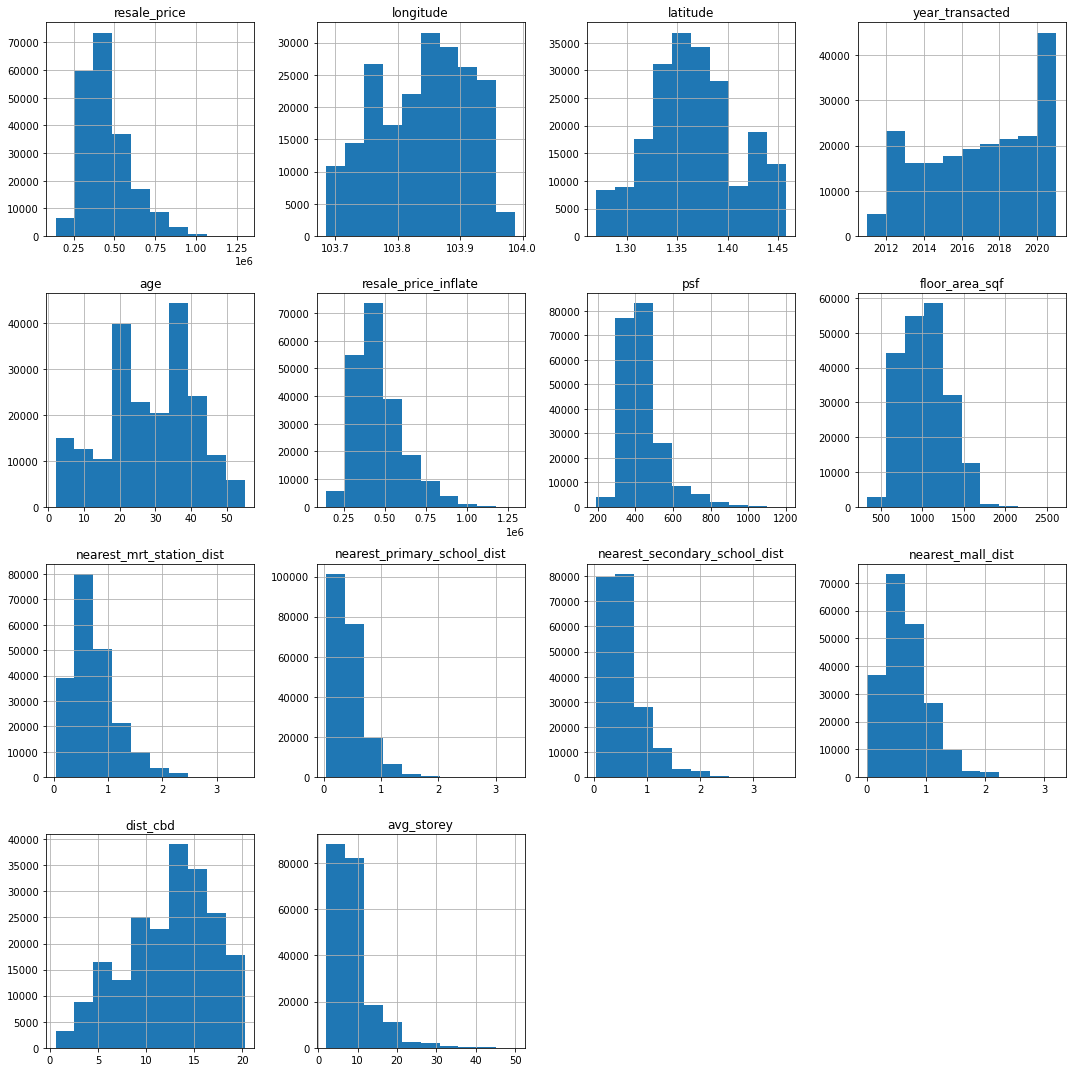

In [7]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show();

Key observations

- most of the transactions were ranged between SGD 250,000 to 750,000 for this data period
- In this 10-year period, the year 2021 had the highest number of transactions
- The Age distribution had 2 peaks, one around the 20-year mark and the other around the 40-year mark
- The distribution for common floor area sqf is relatively symmetrical with a peak around the 1000 sqf range
- The distributions for distance from HDB and nearest mrt station, primary school, secondary school and mall were all right skewed. It meant that HDBs in general could easily find such amenities within the 1km range from their locations
- The dist_cbd distribution is left skewed with most HDBs located within 10-20km range from CBD 

## Correlation matrix against saleprice

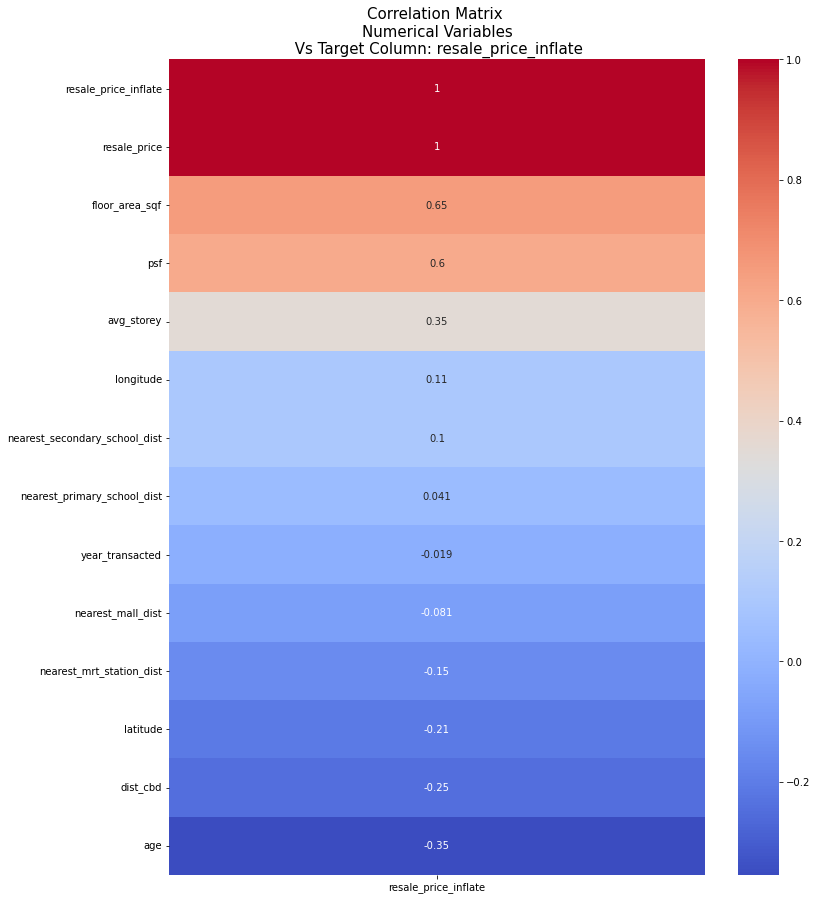

In [8]:
plt.figure(figsize=(12, 15))
data_corr = df.corr()[['resale_price_inflate']].sort_values('resale_price_inflate', ascending=False)

sns.heatmap(data_corr, cmap = 'coolwarm', annot=True);
plt.title('Correlation Matrix \nNumerical Variables\n Vs Target Column: resale_price_inflate', size = 15);


Key observations
- Unsurprisingly, we see the usual suspects that floor area correlates, psf and floor level correlates positively to the resale price
- Conversely, age correlates negatively to the resale price which is to be expected as buyers would prefer new houses compared to old houses
- Interestingly, we see that our distance based features do not really correlate to prices 

## Correlation matrix amongst numeric features in dataset

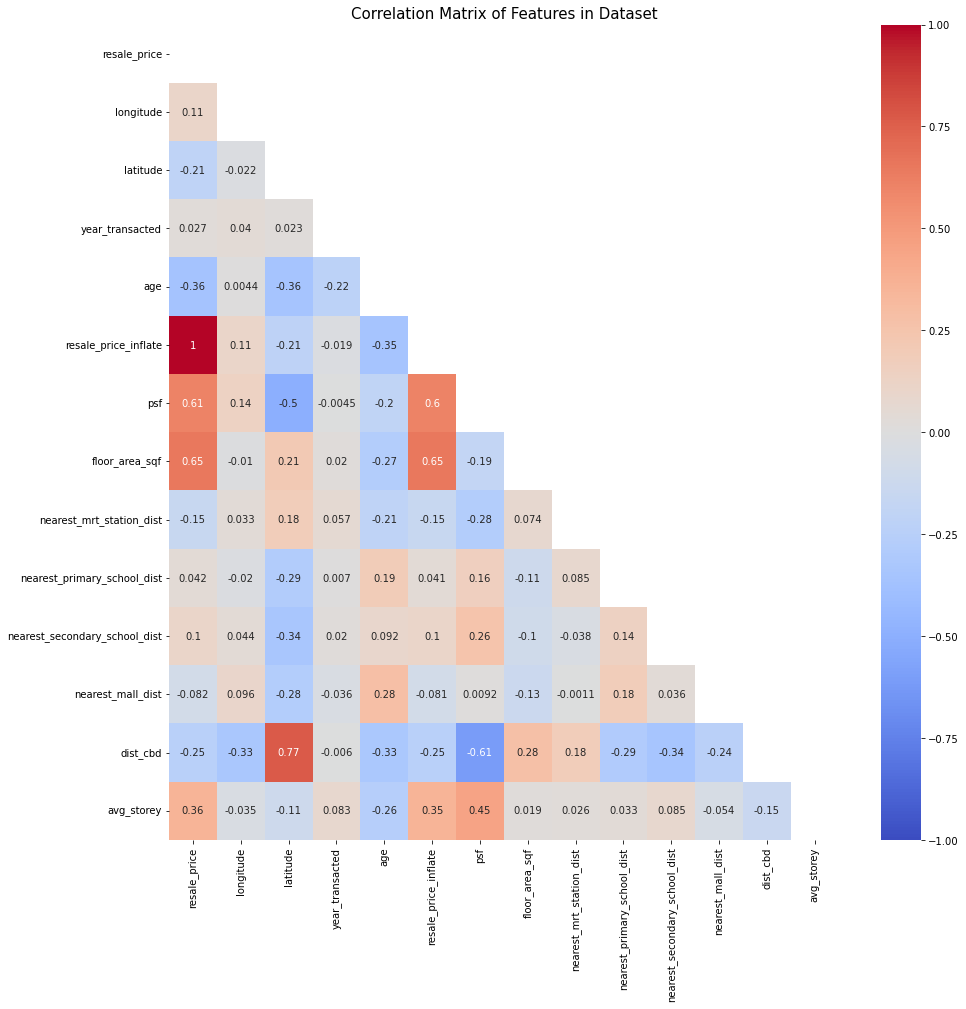

In [9]:
plt.figure(figsize=(15,15))
matrix = np.triu(df.corr())

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', mask=matrix, vmin=-1, vmax=1);

plt.title('Correlation Matrix of Features in Dataset', size = 15);

Key observations
- resale_price and resale_price_inflate has perfect positive correlation which should be the case since resale_price_inflate was feature engineered from resale_price
- psf and floor_area_sqf has decent positive correlation with resale_price

## Boxplot of nominal features against resale price (inflated)

In [10]:
nominal = ['flat_type', 'flat_model', 'town', 'storey_range']

We will display box plots for each nominal feature to see if there are distinct categories within which differentiates saleprice. 

In [11]:
df['flat_type']

month
2011-10-01    3 ROOM
2011-10-01    4 ROOM
2011-10-01    4 ROOM
2011-10-01    4 ROOM
2011-10-01    4 ROOM
               ...  
2021-10-01    4 ROOM
2021-10-01    4 ROOM
2021-10-01    5 ROOM
2021-10-01    4 ROOM
2021-10-01    4 ROOM
Name: flat_type, Length: 206191, dtype: object

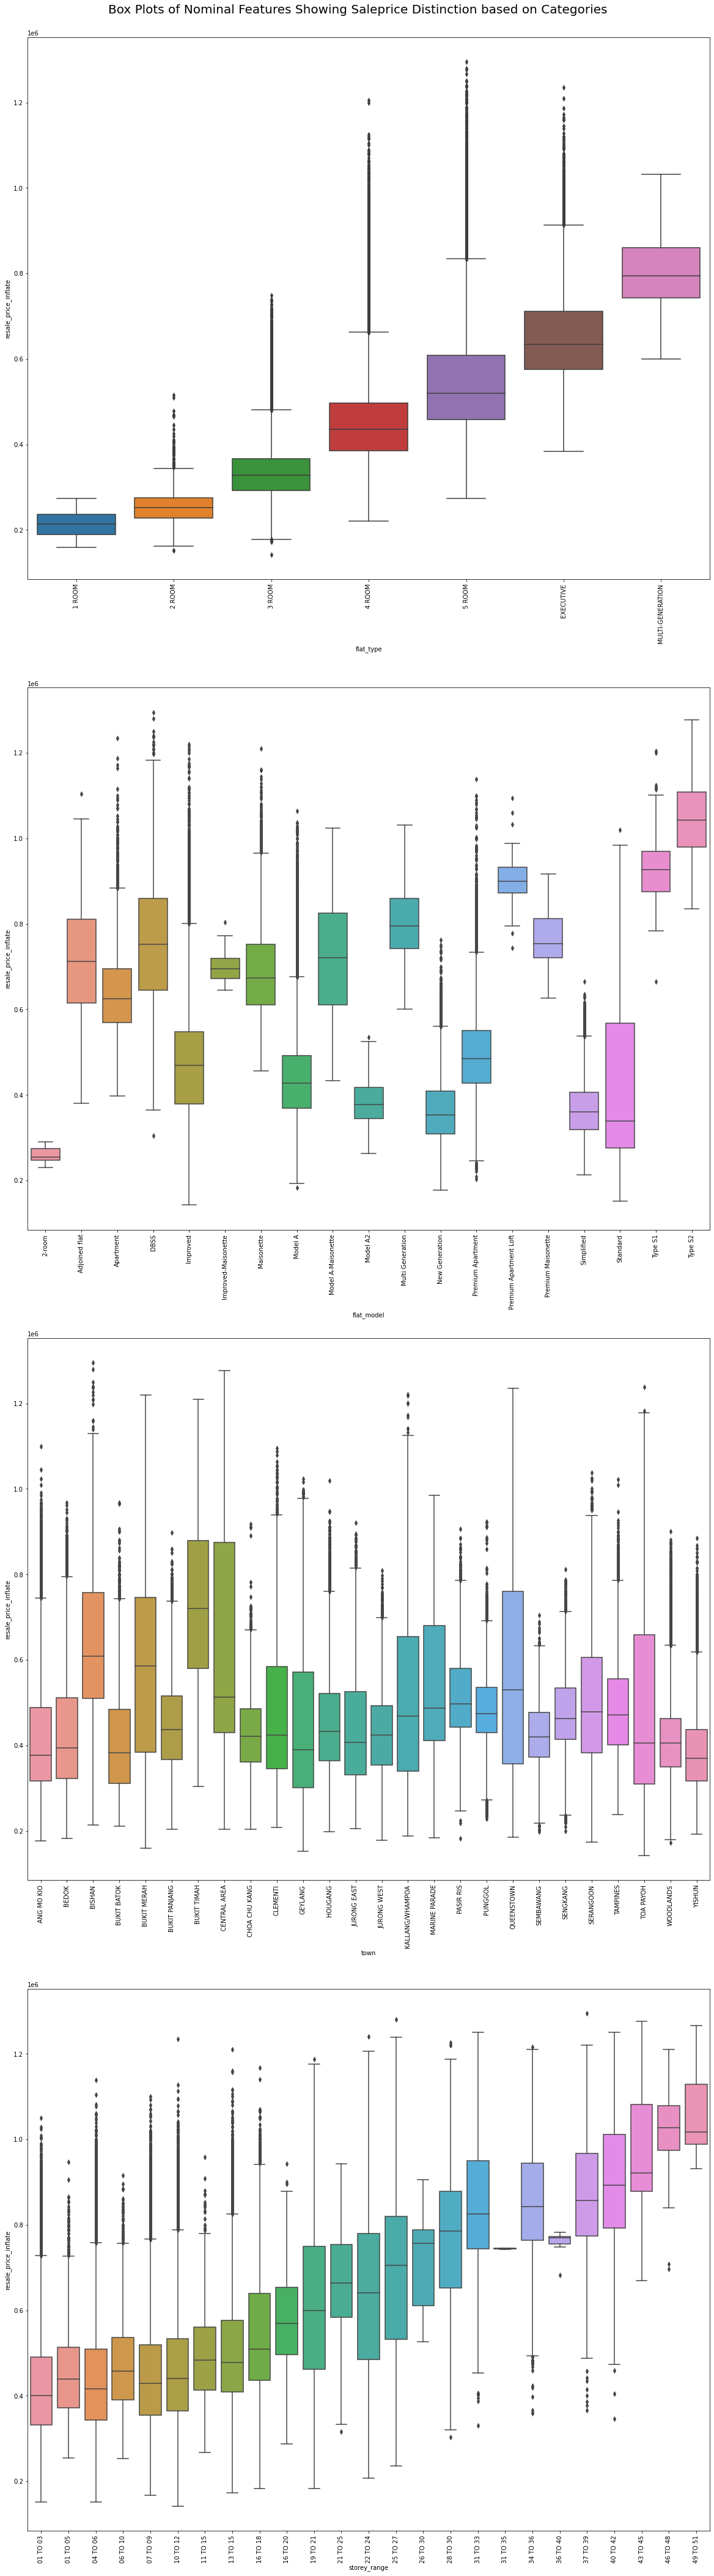

In [12]:
plt.figure(figsize=(20, 75))
plt.tight_layout()
plt.suptitle('Box Plots of Nominal Features Showing Saleprice Distinction based on Categories', fontsize=20, x=0.5, y=0.89)

for i in range(len(nominal)):
    plt.subplot(4, 1, i+1)
    # order by ascending median values whenever possible
    my_order = df.groupby(by=[nominal[i]])['resale_price_inflate'].median().index
    sns.boxplot(x=df[nominal[i]], y=df['resale_price_inflate'], order=my_order)
    plt.xticks(rotation=90);

Key observation:
- we see obvious distinctions of price range for flat_type and storey_range
- looking at our town feature, we observe that generally, where your HDB is located doesn't really influence pricing, with the exception of centrally located towns such as Bishan, Bukit Merah, Bukit Timah, Central Area

## Histogram of nominal features

We will have a look at the distributions of all non numerical (nominal) features to compare its variability of categories within each feature. 

(array([29891., 10038., 13444., 26583., 43382., 14665., 27791.,  8546.,
        24184.,  7667.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

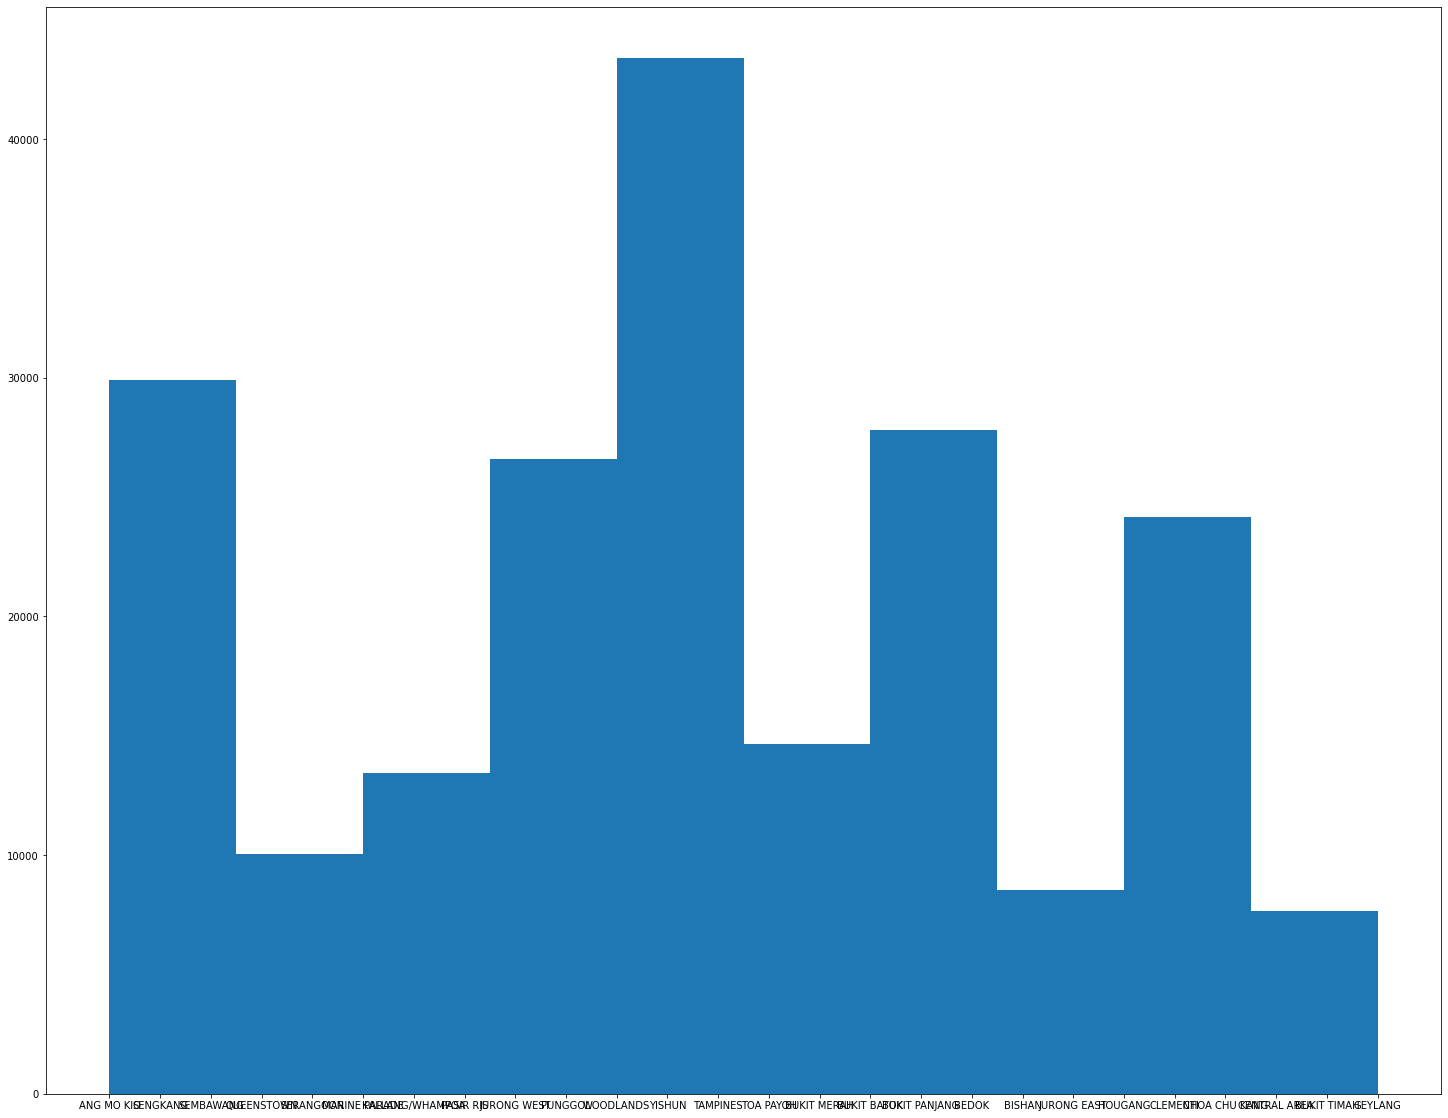

In [30]:
plt.figure(figsize=(25, 20))
plt.hist(x=df['town'])

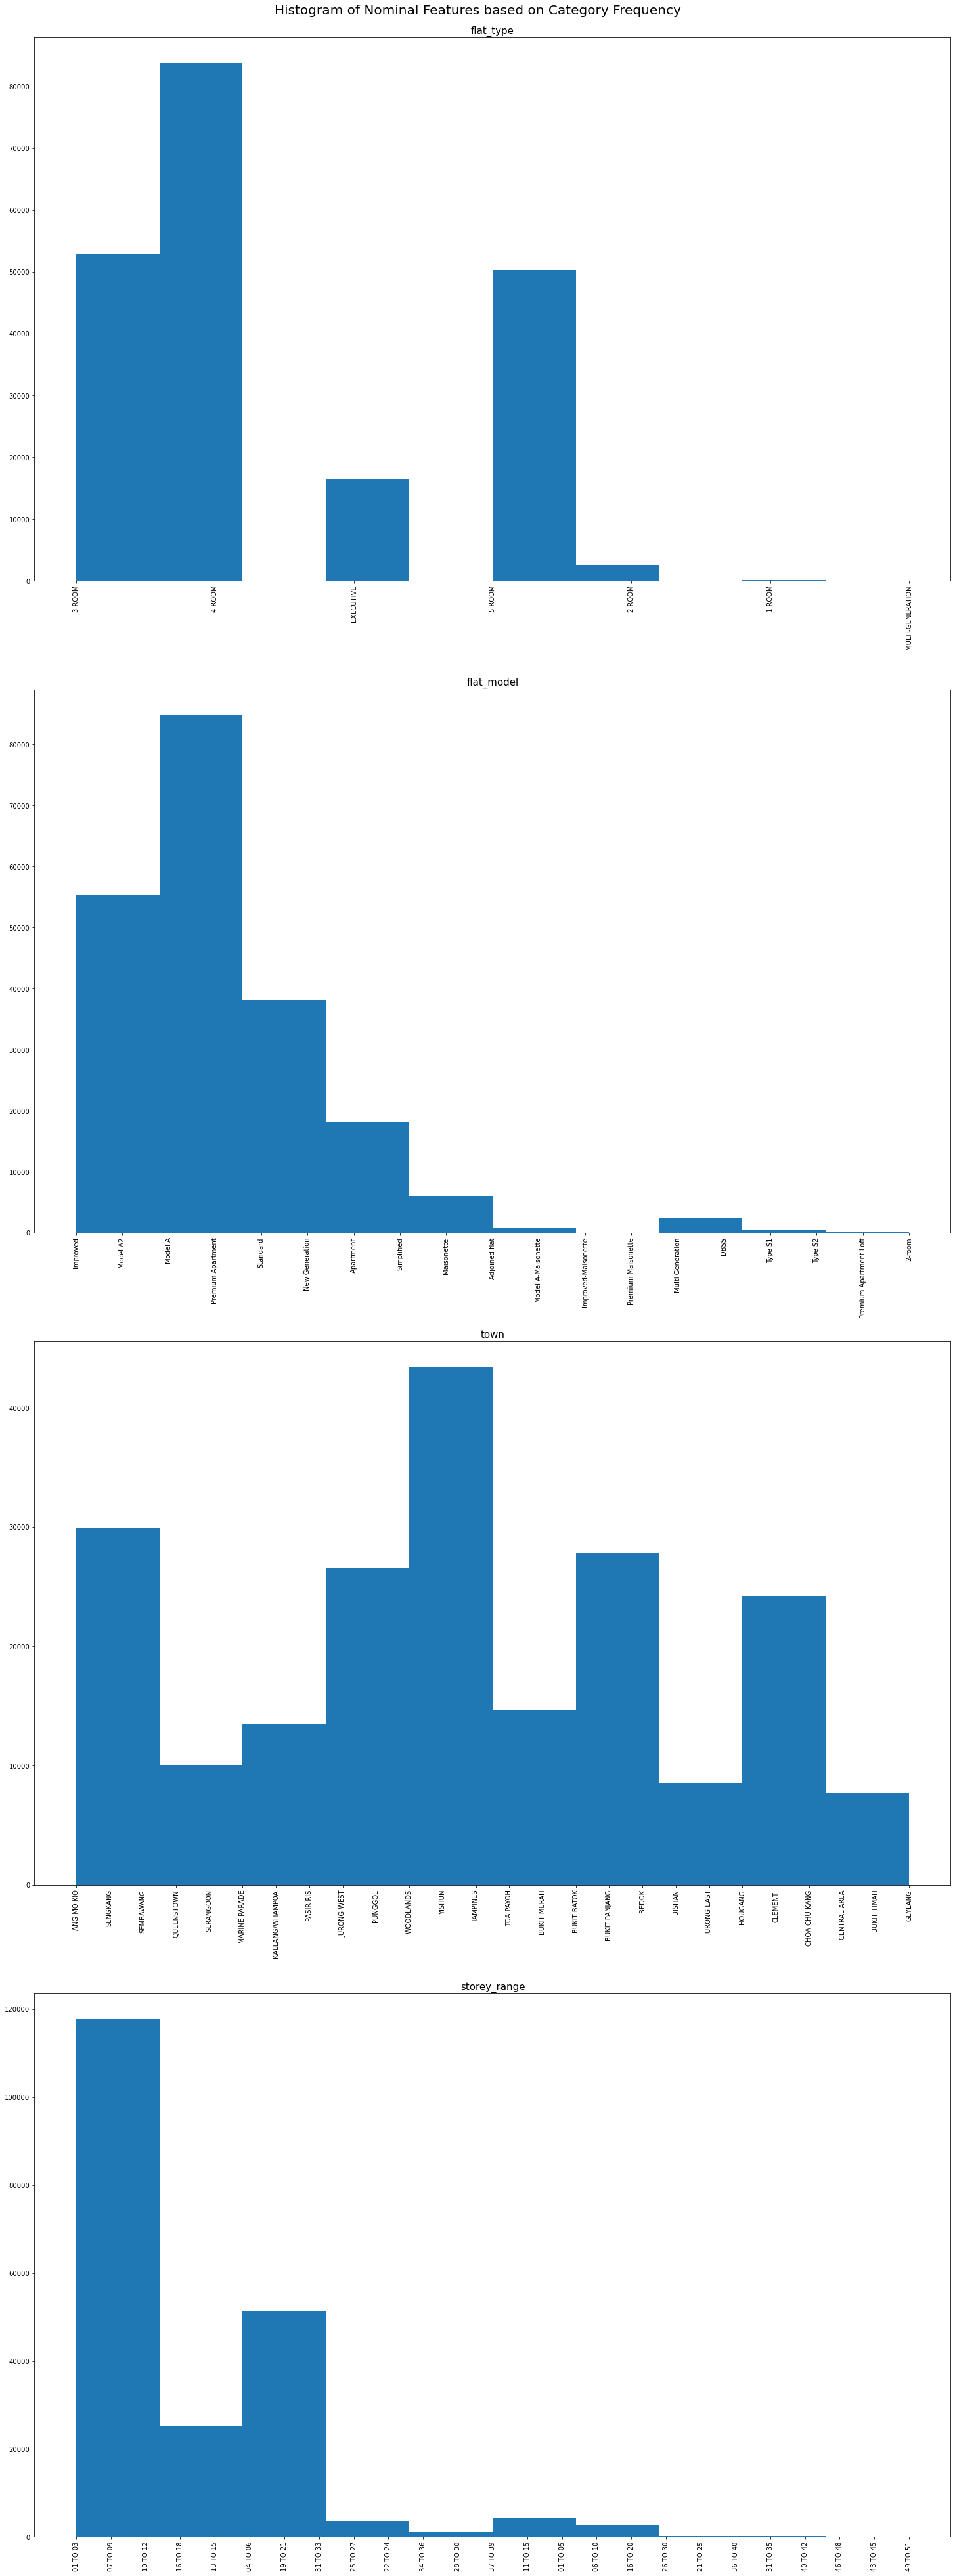

In [13]:
plt.figure(figsize=(25, 70))
plt.tight_layout()
plt.suptitle('Histogram of Nominal Features based on Category Frequency', fontsize=20, x=0.5, y=0.89)

for i in range(len(nominal)):
    plt.subplot(4, 1, i+1)
    plt.hist(x=df[nominal[i]])
    plt.title(nominal[i], fontsize=15)
    plt.xticks(rotation=90);

- In terms of distribution:
  - The most common flat types were 3, 4 and 5-rooms
  - Model A and Premium Apartments were the most common flat models
  - interestingly, towns in the north such as Woodlands and Yishun had one of the highest number of transactions throughout the 10-year period

## Time series plots

### Time series of overall median HDB resale price

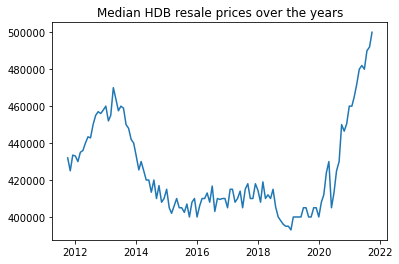

In [14]:
plt.plot(df['resale_price'].groupby(df.index).median())
plt.title('Median HDB resale prices over the years');

Referenced from source [here](https://www.homequarters.com.sg/2020/06/03/2013-the-fateful-year-that-caused-hdb-prices-to-plunge-10/)

Key observations
- The sharp drop in prices in 2013 was due to Mortgage Servicing Ratio (MSR) is being reduced
- For loans from banks, it was lowered from 40% to 30%. For loans from HDB, it was lowered from 40% to 35%. What this suggests is that HDB buyers are not able to get as much loans as compared to before.
- Together with the MSR reduction, Singapore Permanent Residents (PRs) who own a HDB flat will not be allowed to rent out the entire flat. On top of that, PRs who own a HDB flat must sell their flat within 6 months of purchasing a private property in Singapore. This rule is likely created to deter PRs from using HDB for rental income and then move on to stay in private housing, or perhaps do not even stay in Singapore.
- On 27 August 2013, the government introduced two measures to further stabilize the HDB resale market.
  - One, they are reducing the maximum loan term from 30 years to 25 years. This means that HDB buyers will need to pay a higher monthly loan repayment due to the shorter loan term. In addition, for HDB loans, the MSR is reduced from 35% to 30%
  - Two, they ruled that PR households to wait three years from the date of obtaining PR status, before they can buy a resale HDB flat. The demand of HDB resale flat, which was previously made up of a significant number of PR households, will be greatly reduced with the new measure. HDB resale flat is the only type of HDB that a PR household can buy as they cannot apply for a new flat.


### Time series of number of transactions by flat type

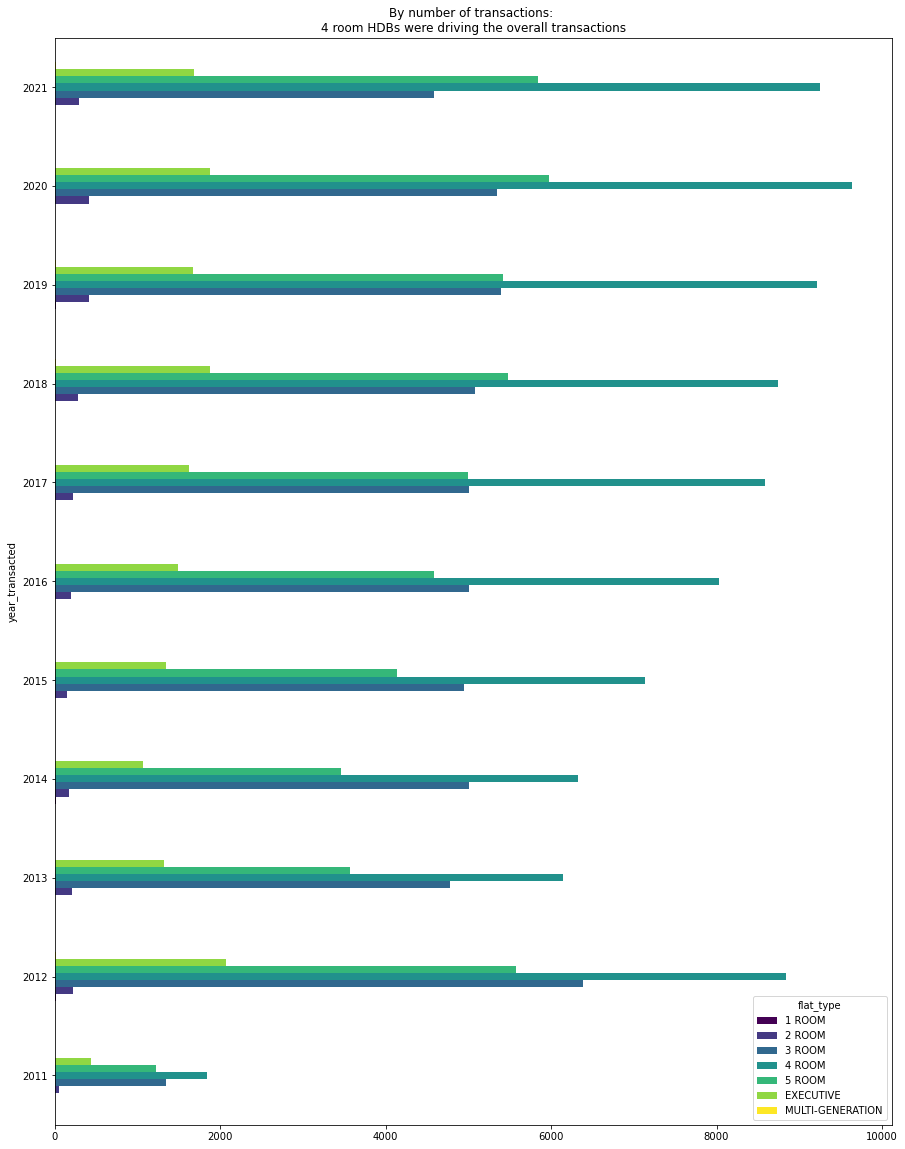

In [15]:
df.groupby('flat_type')['year_transacted'].value_counts().unstack(0).plot.barh(
    figsize=(15, 20), cmap='viridis', title='By number of transactions: \n4 room HDBs were driving the overall transactions');

### Time series of median resale price by flat type

In [16]:
df_1rm = df[df['flat_type'] == '1 ROOM']
df_2rm = df[df['flat_type'] == '2 ROOM']
df_3rm = df[df['flat_type'] == '3 ROOM']
df_4rm = df[df['flat_type'] == '4 ROOM']
df_5rm = df[df['flat_type'] == '5 ROOM']
df_exec = df[df['flat_type'] == 'EXECUTIVE']
df_multi = df[df['flat_type'] == 'MULTI-GENERATION']

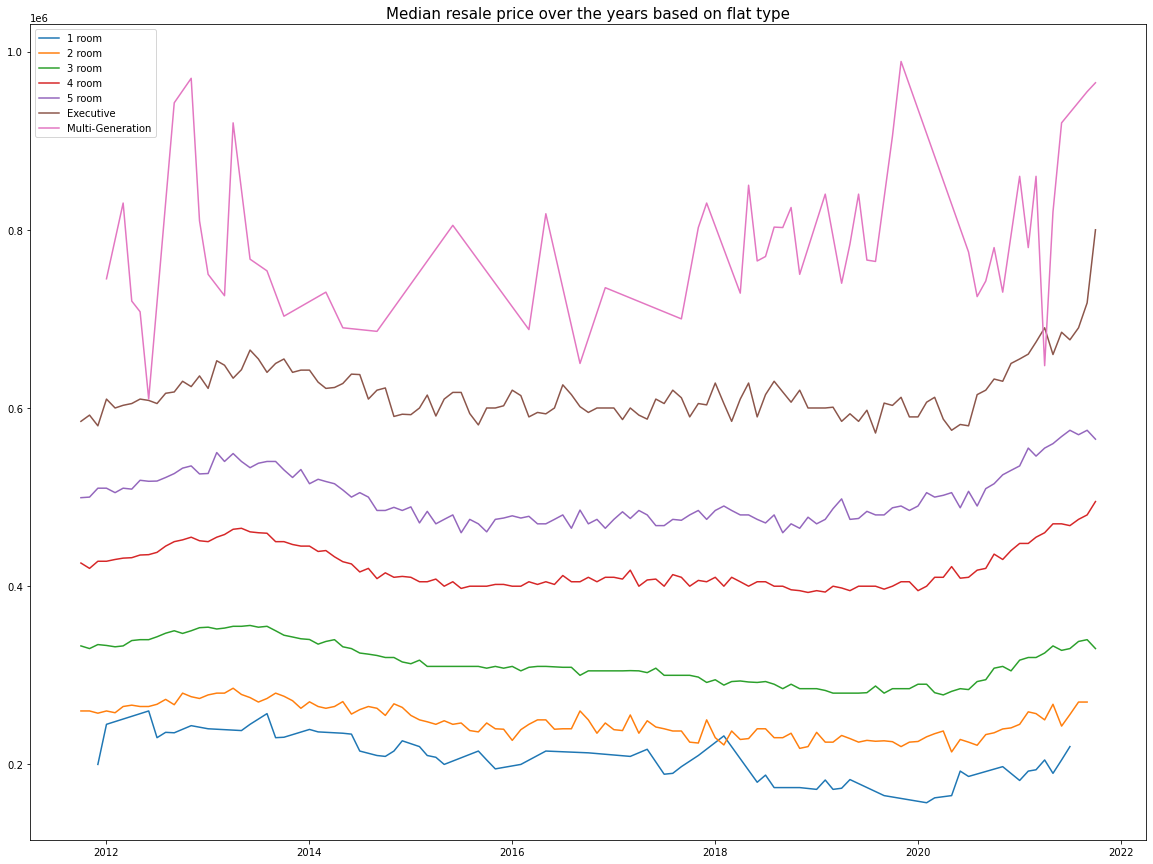

In [17]:
# median resale price by flat type over the years
plt.figure(figsize=(20,15))
plt.tight_layout()

plt.title('Median resale price over the years based on flat type', fontsize=15)
plt.plot(df_1rm['resale_price'].groupby(df_1rm.index).median(), label='1 room')
plt.plot(df_2rm['resale_price'].groupby(df_2rm.index).median(), label='2 room')
plt.plot(df_3rm['resale_price'].groupby(df_3rm.index).median(), label='3 room')
plt.plot(df_4rm['resale_price'].groupby(df_4rm.index).median(), label='4 room')
plt.plot(df_5rm['resale_price'].groupby(df_5rm.index).median(), label='5 room')
plt.plot(df_exec['resale_price'].groupby(df_exec.index).median(), label='Executive')
plt.plot(df_multi['resale_price'].groupby(df_multi.index).median(), label='Multi-Generation')

plt.legend()
plt.show()

In [18]:
# find out number of transactions for each flat type
df['flat_type'].value_counts()

4 ROOM              83732
3 ROOM              52898
5 ROOM              50284
EXECUTIVE           16466
2 ROOM               2624
1 ROOM                106
MULTI-GENERATION       81
Name: flat_type, dtype: int64

Key observations

- During this 10-year period, there were only 81 multi-generation HDB transactions. This could explain its erratic price movement due to lack of transactions compared to the other flat types.
- With the exception of multi-generation flats, prices between 2013 to 2020 has been quite stagnant
- This could be due to the effects of cooling measures which resulted in stagnant prices


### Time series of median floor area sqf by flat type

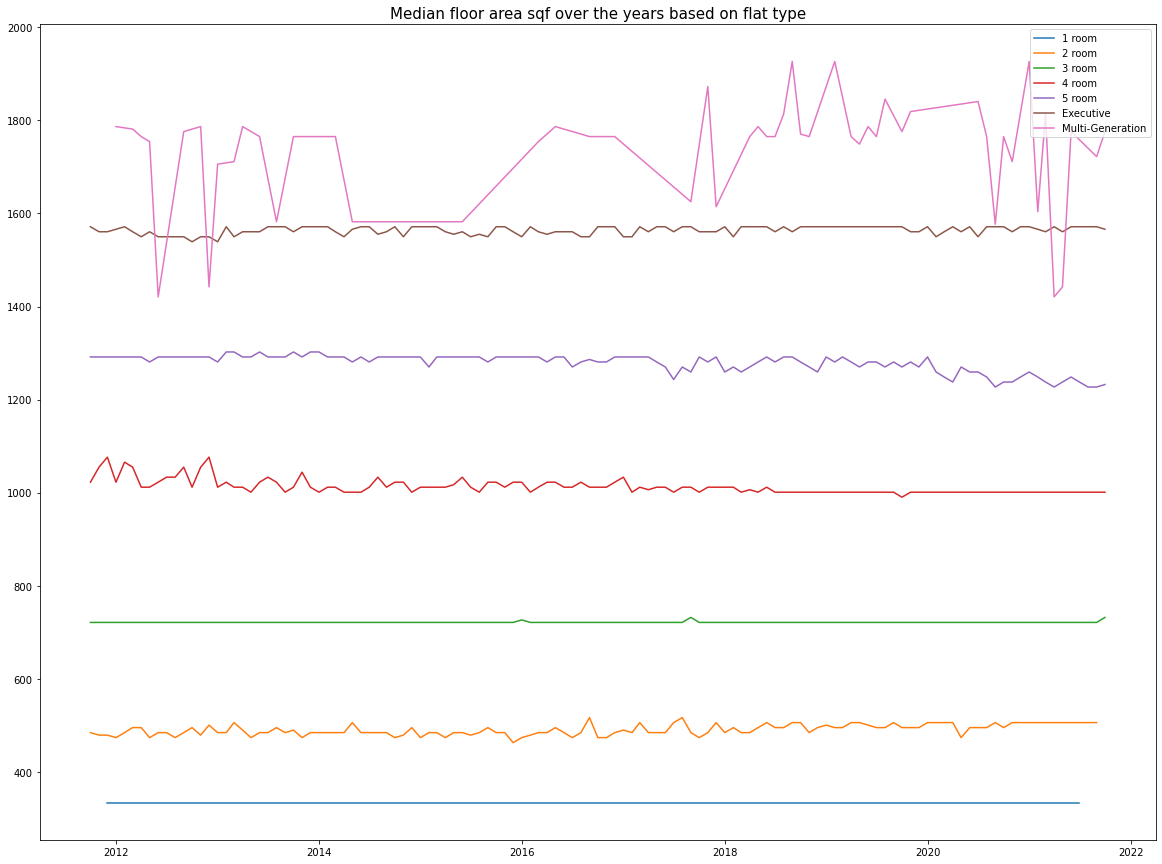

In [19]:
plt.figure(figsize=(20,15))
plt.tight_layout()

plt.title('Median floor area sqf over the years based on flat type', fontsize=15)
plt.plot(df_1rm['floor_area_sqf'].groupby(df_1rm.index).median(), label='1 room')
plt.plot(df_2rm['floor_area_sqf'].groupby(df_2rm.index).median(), label='2 room')
plt.plot(df_3rm['floor_area_sqf'].groupby(df_3rm.index).median(), label='3 room')
plt.plot(df_4rm['floor_area_sqf'].groupby(df_4rm.index).median(), label='4 room')
plt.plot(df_5rm['floor_area_sqf'].groupby(df_5rm.index).median(), label='5 room')
plt.plot(df_exec['floor_area_sqf'].groupby(df_exec.index).median(), label='Executive')
plt.plot(df_multi['floor_area_sqf'].groupby(df_multi.index).median(), label='Multi-Generation')

plt.legend()
plt.show()

Key observations:

- During the 10-year period, the sizes of the HDB units sold with respect to their flat types were very consistent. The only exception was the flat type: multi generation which had varying sizes. This inconsistency could also be due to the lack of sufficient transactions

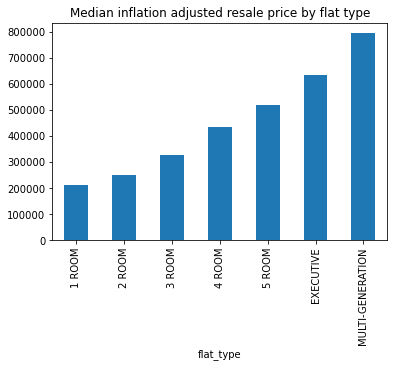

In [20]:
# price ranges (inflation-adjusted) for each flat type
df.groupby('flat_type')['resale_price_inflate'].median().plot(kind='bar')
plt.title('Median inflation adjusted resale price by flat type');

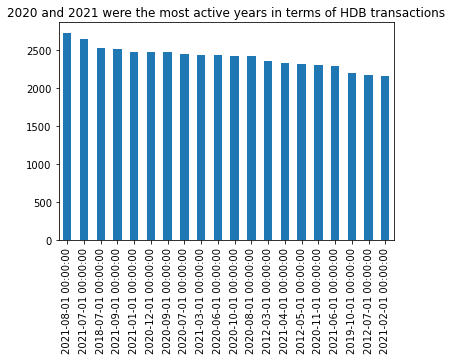

In [21]:
# which years had the highest number of hdb transactions
df.index.value_counts(ascending=False).head(20).plot(kind='bar')
plt.title('2020 and 2021 were the most active years in terms of HDB transactions');

Unsurprisingly, the months in 2020 and 2021 (Covid period) formed the bulk of the highest number of HDB transactions during this 10-year data period. This can contributed by several factors:

1. Low interest rate environment which meant housing loans were cheaper 
2. Delays in BTO projects due to labour shortages and workplace safe management measures which meant slowdown in construction

### Time series of psf by town

In [22]:
town_list = list(df['town'].unique())
town_list

['ANG MO KIO',
 'SENGKANG',
 'SEMBAWANG',
 'QUEENSTOWN',
 'SERANGOON',
 'MARINE PARADE',
 'KALLANG/WHAMPOA',
 'PASIR RIS',
 'JURONG WEST',
 'PUNGGOL',
 'WOODLANDS',
 'YISHUN',
 'TAMPINES',
 'TOA PAYOH',
 'BUKIT MERAH',
 'BUKIT BATOK',
 'BUKIT PANJANG',
 'BEDOK',
 'BISHAN',
 'JURONG EAST',
 'HOUGANG',
 'CLEMENTI',
 'CHOA CHU KANG',
 'CENTRAL AREA',
 'BUKIT TIMAH',
 'GEYLANG']

In [23]:
df_psf = df.groupby([df.index, 'town'])[['psf']].median()

In [24]:
df_psf.reset_index(inplace=True)

In [25]:
df_psf.set_index('month', inplace=True)

In [26]:
df_psf

,town,psf
month,,
2011-10-01,ANG MO KIO,452.053035
2011-10-01,BEDOK,448.744690
2011-10-01,BISHAN,496.331790
2011-10-01,BUKIT BATOK,421.766326
2011-10-01,BUKIT MERAH,552.685453
...,...,...
2021-10-01,SERANGOON,580.954239
2021-10-01,TAMPINES,445.425965
2021-10-01,TOA PAYOH,578.630535


In [27]:
len(town_list)

26

C:\Users\caspe\anaconda3\envs\capstone\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


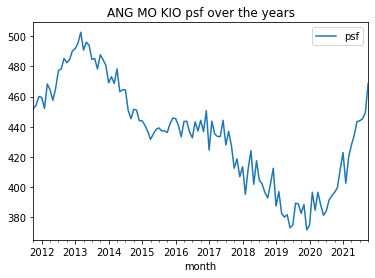

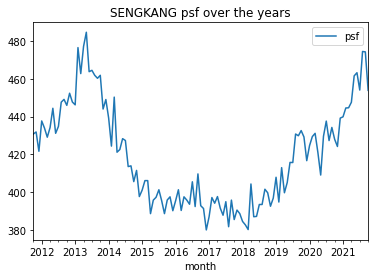

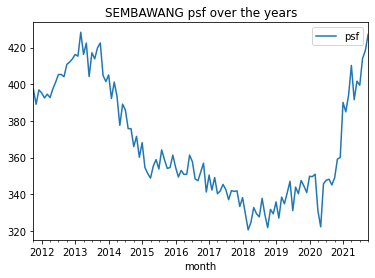

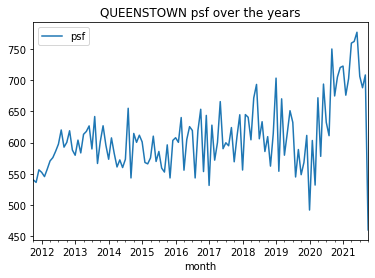

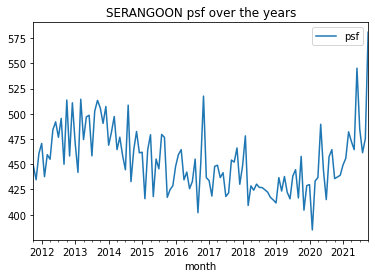

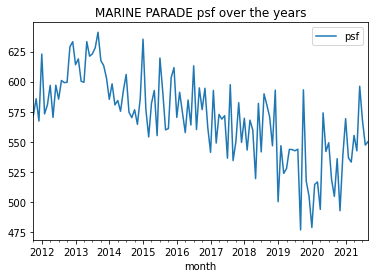

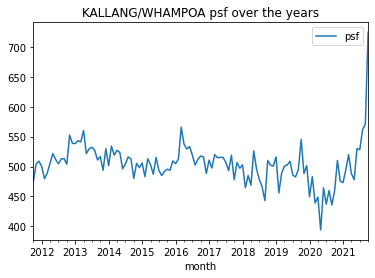

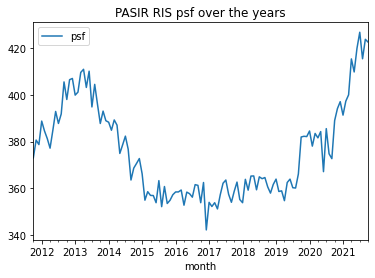

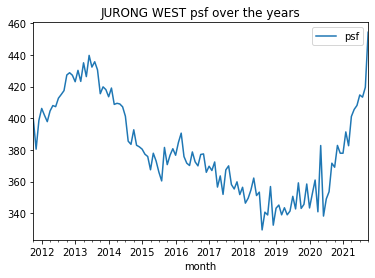

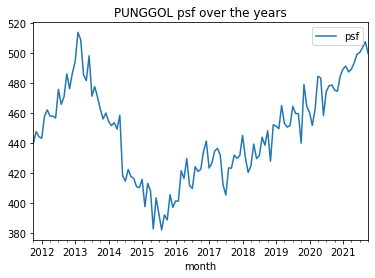

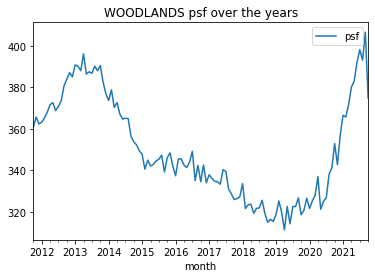

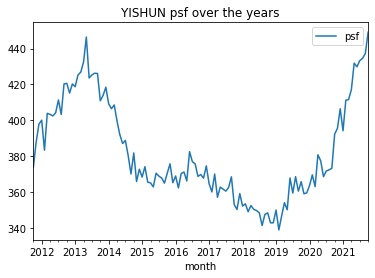

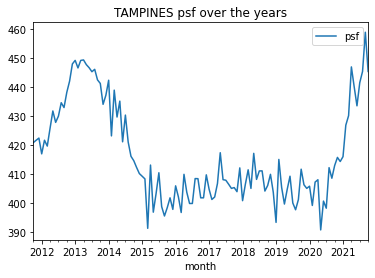

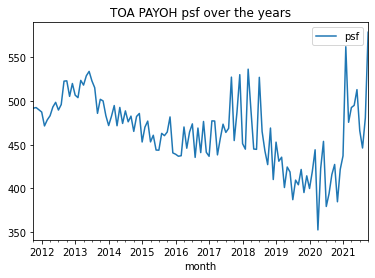

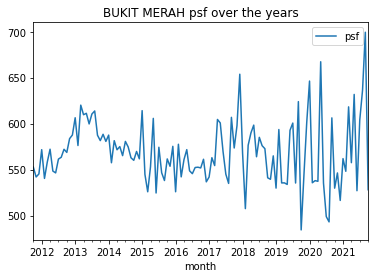

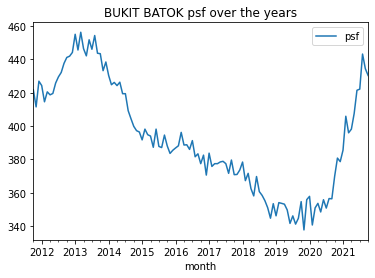

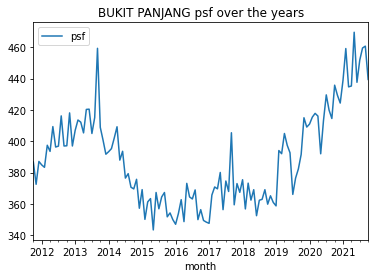

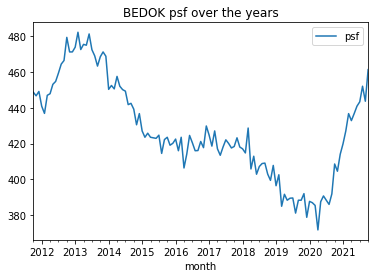

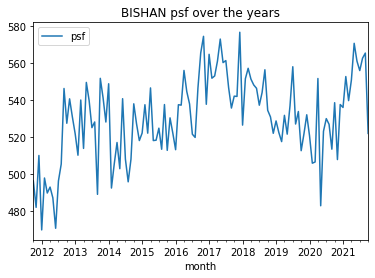

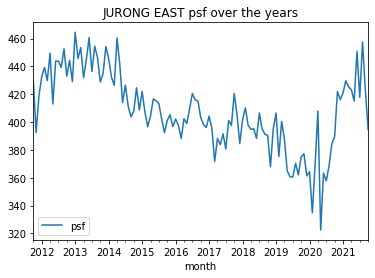

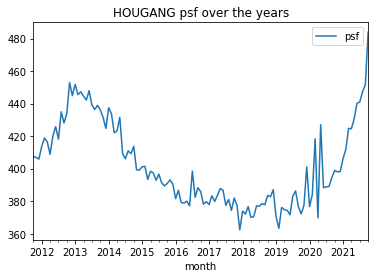

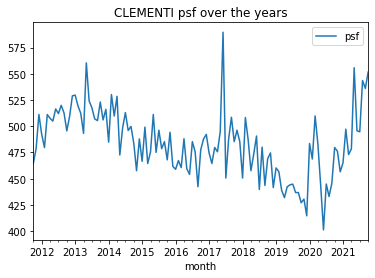

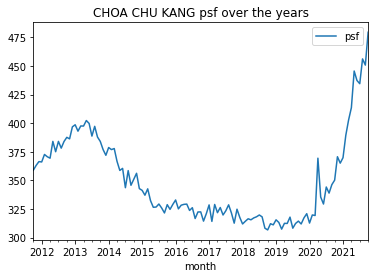

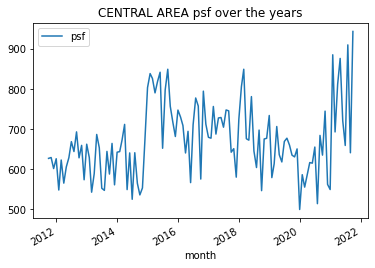

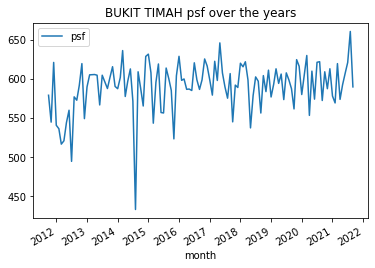

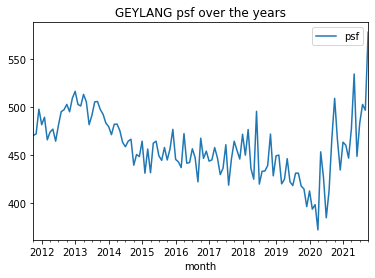

In [28]:
for town in town_list:
    df_psf[df_psf['town'] == town].plot(kind='line')
    plt.title(f'{town} psf over the years')